In [171]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [172]:
img = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')

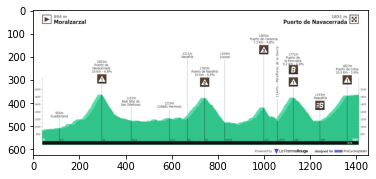

In [173]:
plt.imshow(img)

In [174]:
h,w = img.shape[:2]
mask = np.zeros((h,w), np.uint8)


In [177]:
# Transform to gray colorspace and threshold the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [178]:
# Search for contours and select the biggest one and draw it on mask
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.drawContours(mask, [cnt], 0, 255, -1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [179]:
# Perform a bitwise operation
res = cv2.bitwise_and(img, img, mask=mask)

In [180]:
# Convert black pixels back to white
black = np.where(res==0)
res[black[0], black[1], :] = [255, 255, 255]

In [181]:
# Display the image
cv2.imshow('img', res)

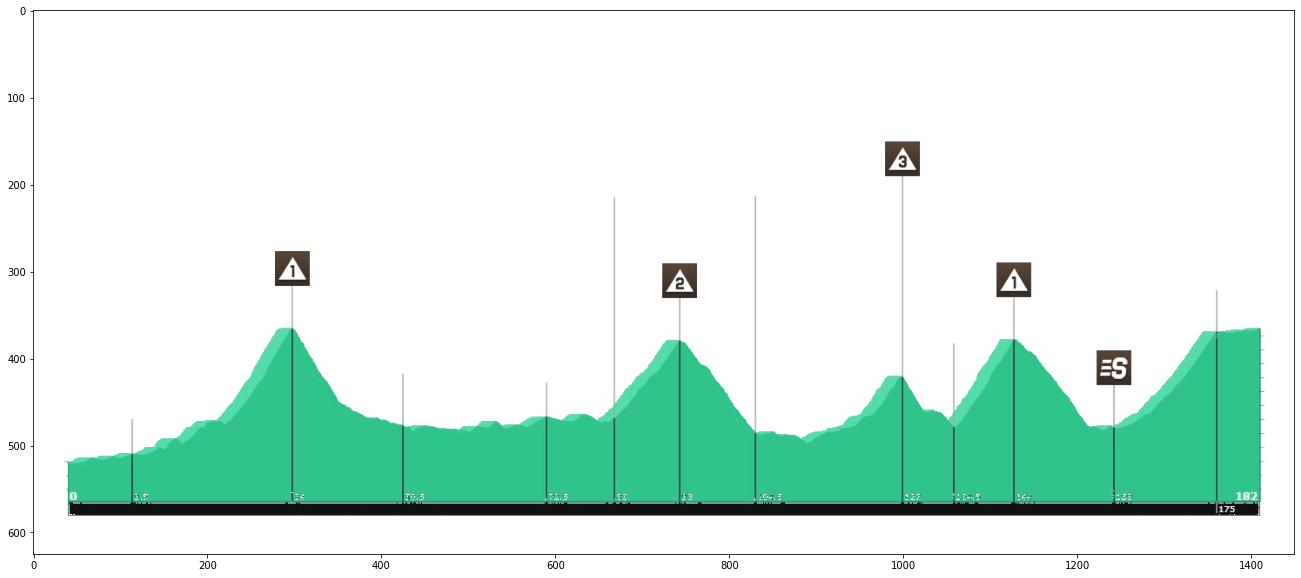

In [183]:
plt.figure(figsize=(30,10))
plt.imshow(res)

In [19]:
res

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

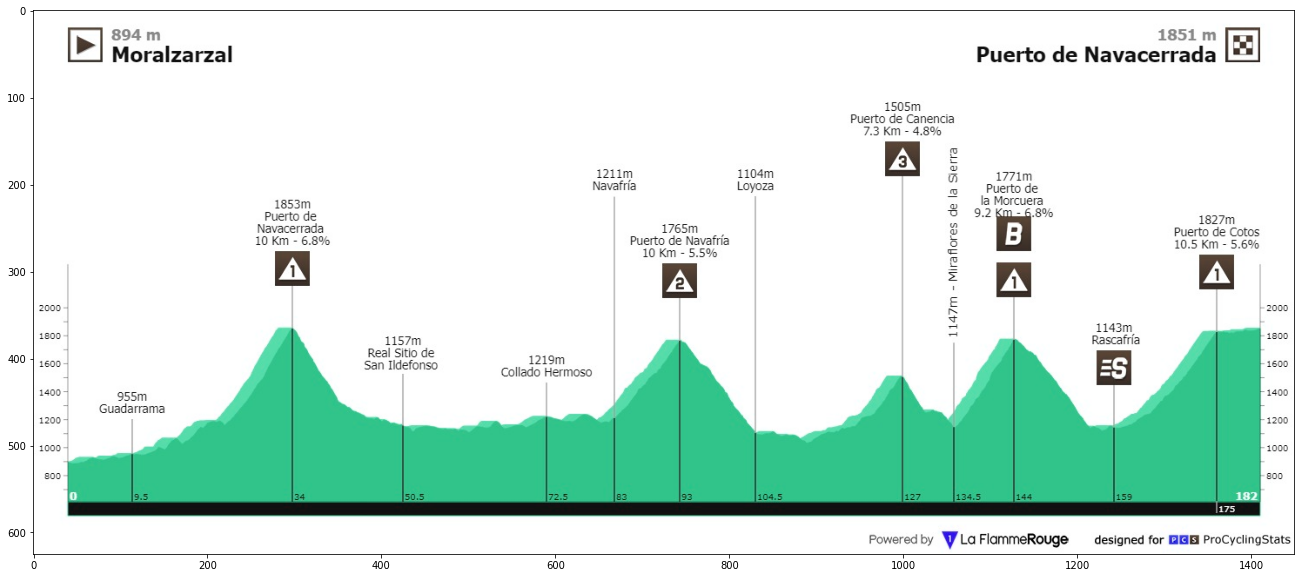

In [184]:
img = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')
plt.figure(figsize=(30,10))
plt.imshow(img)

In [246]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
#mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))


## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

In [247]:
# convert to RGB
image = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

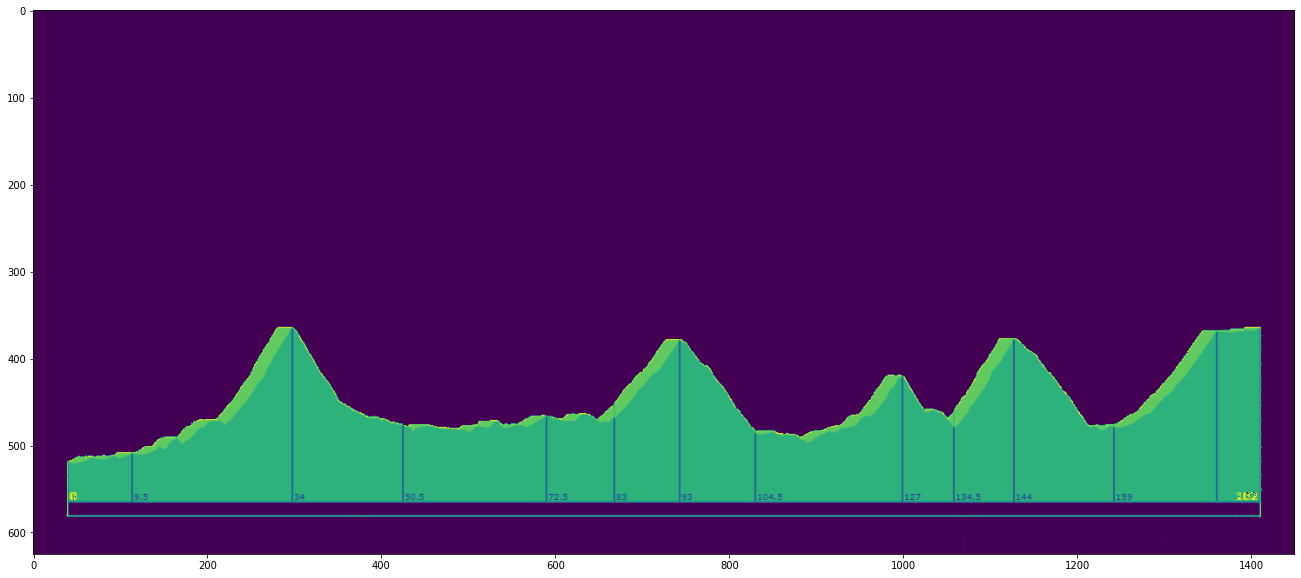

In [251]:
plt.figure(figsize=(30,10))
plt.imshow(gray)

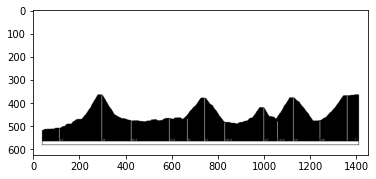

In [249]:
# create a binary thresholded image
_, binary = cv2.threshold(gray, 177, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# show it
plt.imshow(binary, cmap="gray")
plt.show()

In [167]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# draw all contours
image = cv2.drawContours(image, contours, -1, (0, 250, 0), 2)

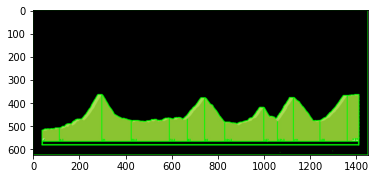

In [168]:
# show the image with the drawn contours
plt.imshow(image)
plt.show()

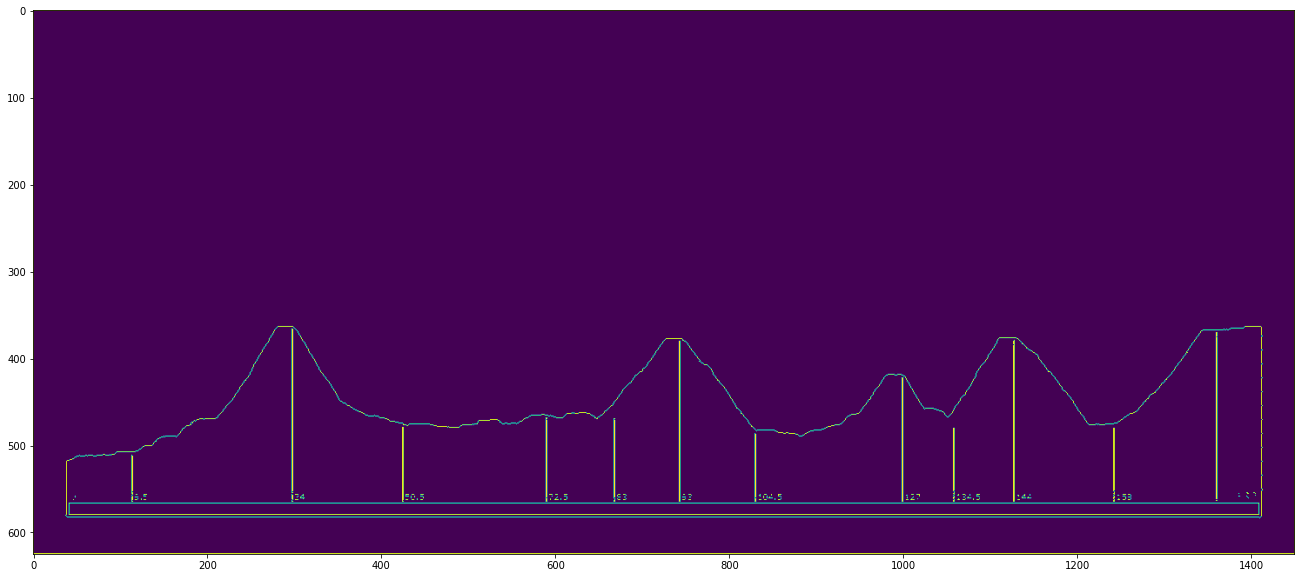

In [170]:
## Draw 
canvas = np.zeros_like(gray)
cv2.drawContours(canvas , contours, -1, (255, 255, 0), 1)

plt.figure(figsize=(40,10))
plt.imshow(canvas)

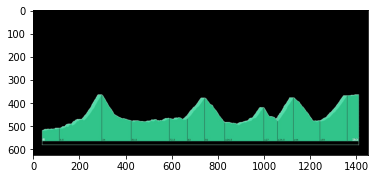

In [13]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
# mask = cv2.inRange(hsv, (36, 25, 25), (86, 255,255))
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

## save 
plt.imshow(green)

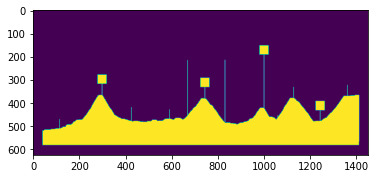

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Read the image and create a blank mask
img = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')
h,w = img.shape[:2]
mask = np.zeros((h,w), np.uint8)

# Transform to gray colorspace and threshold the image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Perform opening on the thresholded image (erosion followed by dilation)
kernel = np.ones((2,2),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Search for contours and select the biggest one and draw it on mask
contours, hierarchy = cv2.findContours(opening,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
cv2.drawContours(mask, [cnt], 0, 255, -1)

# Perform a bitwise operation
res = cv2.bitwise_and(img, img, mask=mask)

# Threshold the image again
gray = cv2.cvtColor(res,cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find all non white pixels
non_zero = cv2.findNonZero(thresh)

# Transform all other pixels in non_white to white
for i in range(0, len(non_zero)):
    first_x = non_zero[i][0][0]
    first_y = non_zero[i][0][1]
    first = res[first_y, first_x]
    res[first_y, first_x] = 255

# Display the image
cv2.imshow('img', res)
plt.imshow(mask)

In [216]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

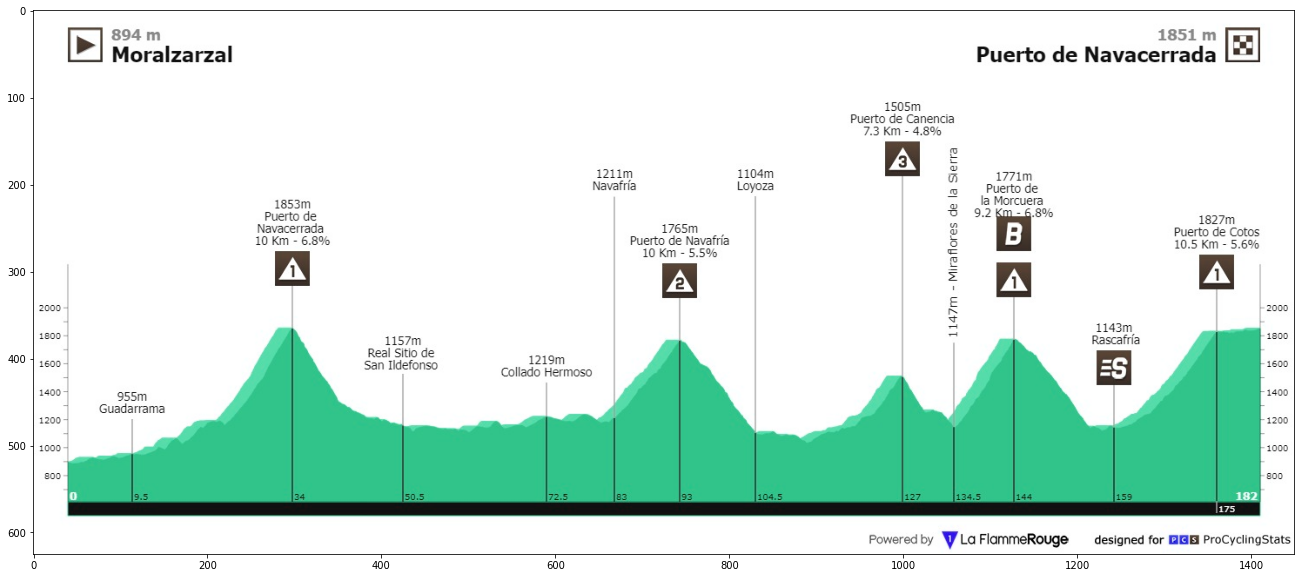

In [235]:
img = cv2.imread('../raw_data/vuelta-a-espana-2022-stage-20.jpeg')
plt.figure(figsize=(30,10))
plt.imshow(img)

In [ ]:
75	215	153	
45	186	121	
45	187	119	

In [321]:
pics = ['../raw_data/giro-d-italia-2017-stage-19.jpeg', '../raw_data/vuelta-a-espana-2022-stage-20.jpeg']


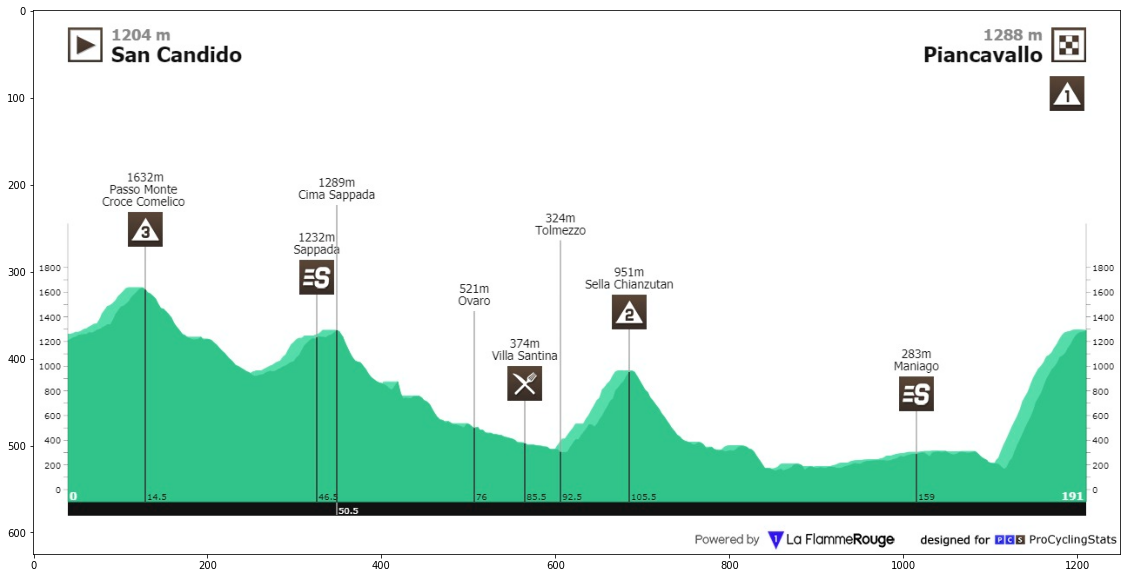

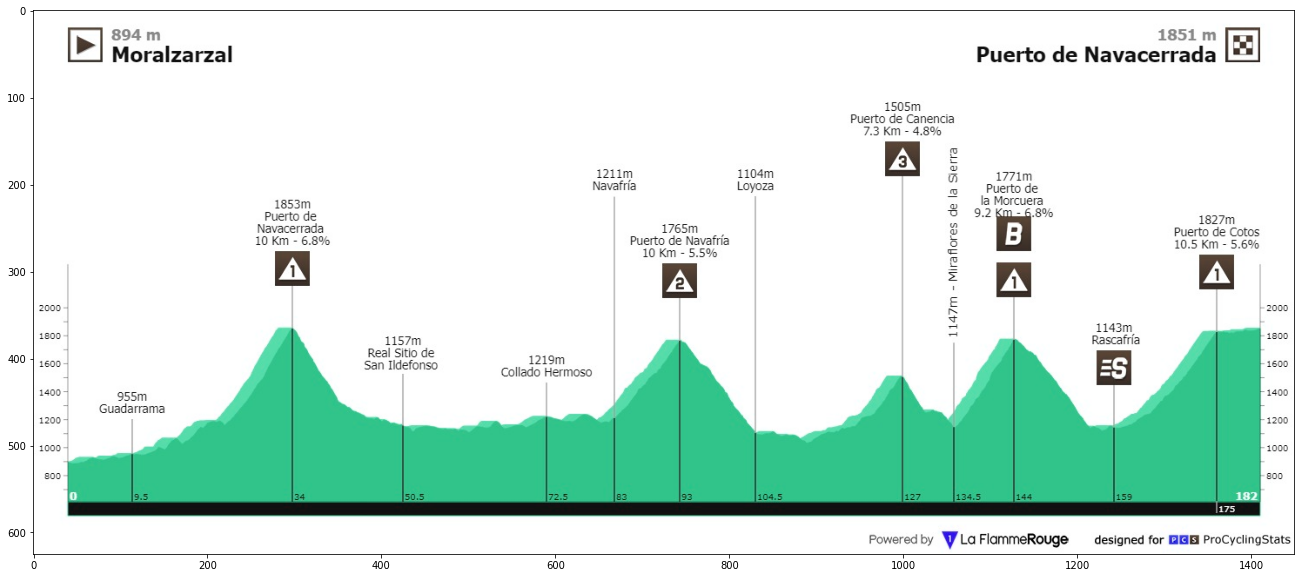

In [353]:
for pic in pics:
    #extract(pic)
    img = cv2.imread(pic)
    plt.figure(figsize=(30,10))
    plt.imshow(img)

In [ ]:
light_yellow = (45, 186,119)    # RGB VALUES
dark_yellow = (75, 215, 153)

mask = cv2.inRange(img, light_yellow, dark_yellow)
result = cv2.bitwise_and(img, img, mask=mask)

In [342]:
def extract(img):
    img = cv2.imread(img)
    
    ## convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    dark= (45, 186,119)    # RGB VALUES
    light= (75, 215, 153)

    ## mask of green (36,25,25) ~ (86, 255,255)
    mask = cv2.inRange(hsv, (150, 64,83),(150, 76, 73))
    #mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))
    plt.imshow(mask)

    ## slice the green
    imask = mask>0
    green = np.zeros_like(img, np.uint8)
    green[imask] = img[imask]
    
    # convert to RGB
    image = cv2.cvtColor(green, cv2.COLOR_BGR2RGB)
    # convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # create a binary thresholded image
    _, binary = cv2.threshold(gray, 177, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    # find the contours from the thresholded image
    contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    # draw all contours
    image = cv2.drawContours(image, contours, -1, (0, 250, 0), 2)
    
    ## Draw 
    canvas = np.zeros_like(image)
    drawing = cv2.drawContours(canvas , contours, -1, (0, 255, 0), 1)[:,:,1]

    plt.figure(figsize=(40,10))
    #print(drawing.shape)
    #return plt.imshow(canvas[:,:,1])
    #print(np.unique(drawing, return_counts=True))
    
    print(drawing.shape)
    
    plt.imshow(np.flipud(drawing), origin='lower')
    
    return drawing

(625, 1450)


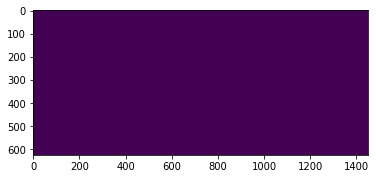

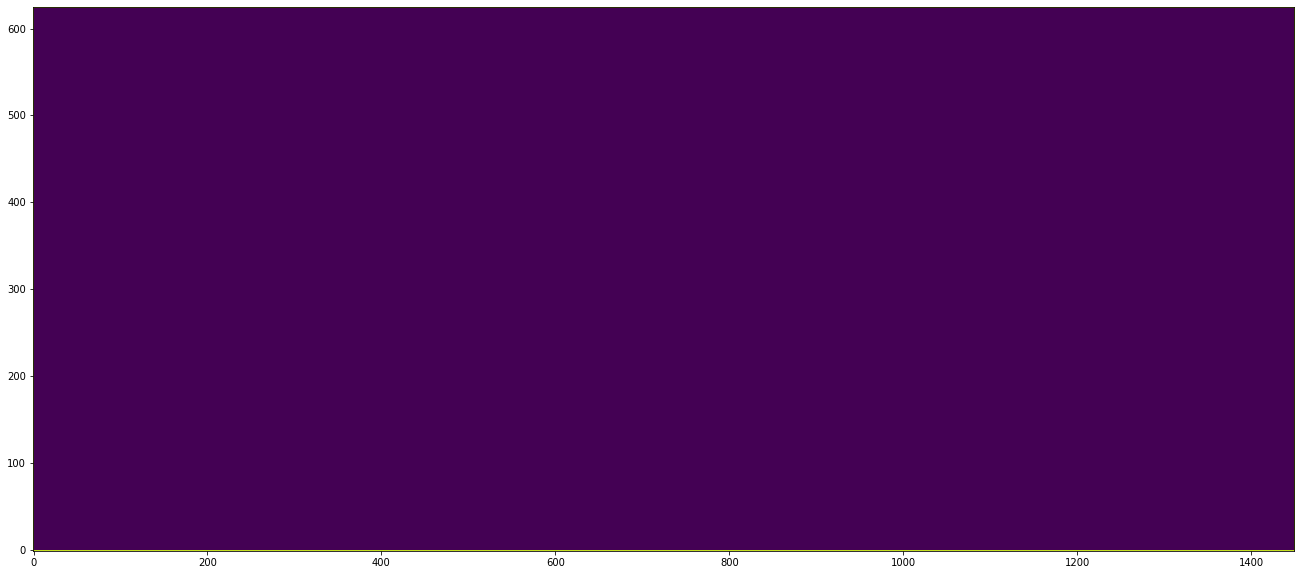

In [343]:
drawing = extract(pics[1])

In [280]:
np.unique(drawing)

array([  0, 255], dtype=uint8)

In [312]:
x, y = np.where(np.flipud(drawing)==255)  # Gives the indexes in A for which value = 2

In [316]:
merged = np.array([[xx, yy] for xx, yy  in zip(x,y)])

for i in np.unique(merged[:,0]):
    print(i)
    #print(merged[i,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [284]:

i, j = np.unravel_index(np.argmax(drawing, 0), drawing.shape)

np.unique(i)

array([0])

In [233]:
indices = np.array(np.where(drawing == 255)).T
indices

array([], shape=(0, 1), dtype=int64)

In [234]:
plt.scatter(indices[:,0], indices[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [222]:
indices[:,1]

array([   0,    1,    2, ..., 1247, 1248, 1249])

In [225]:
for pic in pics:
    extract(pic)

[[255 255 255 ... 255 255 255]
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]


<Figure size 2880x720 with 0 Axes>

<Figure size 2880x720 with 0 Axes>

In [226]:
a = np.arange(6).reshape(2,3) + 10
a

array([[10, 11, 12],
       [13, 14, 15]])

In [227]:
np.where(a == 13)

(array([1]), array([0]))

In [228]:
np.argmin(a, axis=0)

array([0, 0, 0])

In [229]:
drawing

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [351]:
def new_extract(link):
    img = cv2.imread(link)
    
    ## convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ## mask of green (36,0,0) ~ (70, 255,255)
    mask1 = cv2.inRange(hsv, (36, 0, 0), (98, 193,142))

    ## mask o yellow (15,0,0) ~ (36, 255, 255)
    mask2 = cv2.inRange(hsv, (15,0,0), (123, 216, 174))

    ## final mask and masked
    mask = cv2.bitwise_or(mask1, mask2)
    target = cv2.bitwise_and(img,img, mask=mask)

    cv2.imwrite("target.png", target)
    
    light_yellow = (45, 186,119)    # RGB VALUES
    dark_yellow = (75, 215, 153)

    mask = cv2.inRange(img, light_yellow, dark_yellow)
    result = cv2.bitwise_and(img, img, mask=mask)

    plt.figure(figsize=(30,10))
    plt.imshow(result)

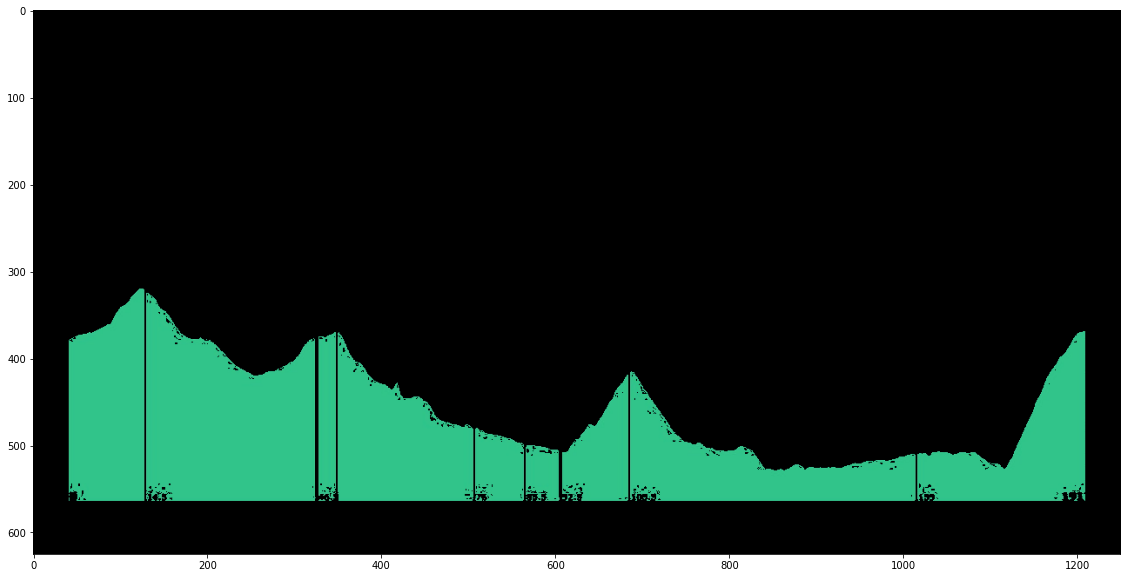

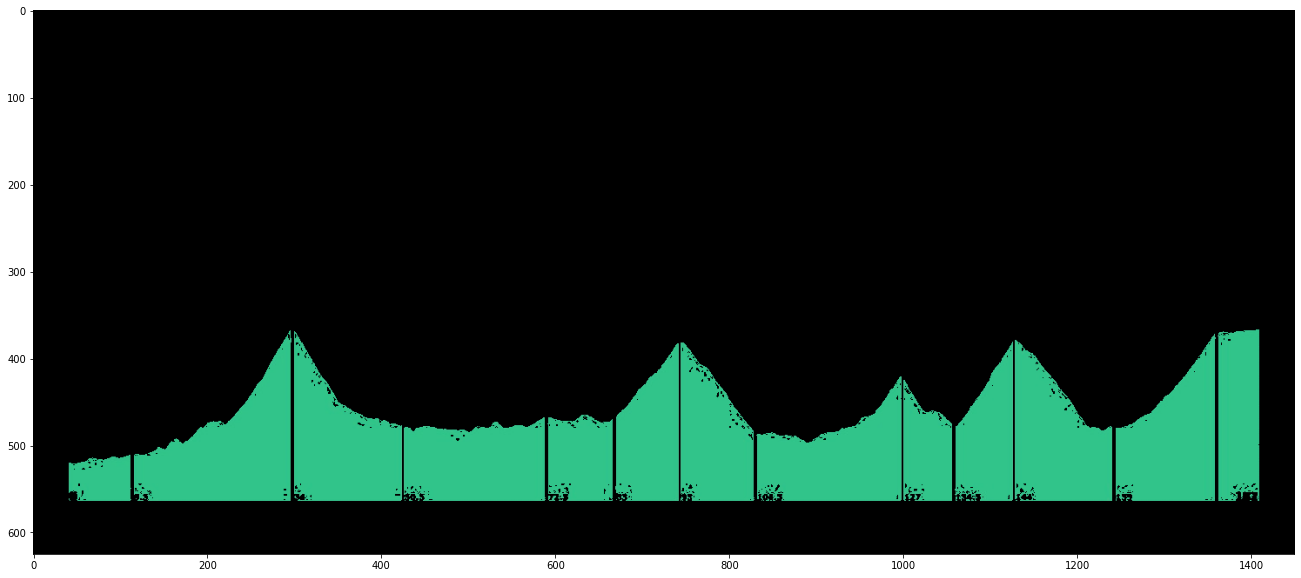

In [352]:
for pic in pics:
    new_extract(pic)

In [347]:
img = cv2.imread('../raw_data/giro-d-italia-2017-stage-19.jpeg')


In [348]:
## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## mask of green (36,0,0) ~ (70, 255,255)
mask1 = cv2.inRange(hsv, (36, 0, 0), (98, 193,142))

## mask o yellow (15,0,0) ~ (36, 255, 255)
mask2 = cv2.inRange(hsv, (15,0,0), (123, 216, 174))

## final mask and masked
mask = cv2.bitwise_or(mask1, mask2)
target = cv2.bitwise_and(img,img, mask=mask)

cv2.imwrite("target.png", target)

True

In [349]:
light_yellow = (45, 186,119)    # RGB VALUES
dark_yellow = (75, 215, 153)

mask = cv2.inRange(img, light_yellow, dark_yellow)
result = cv2.bitwise_and(img, img, mask=mask)



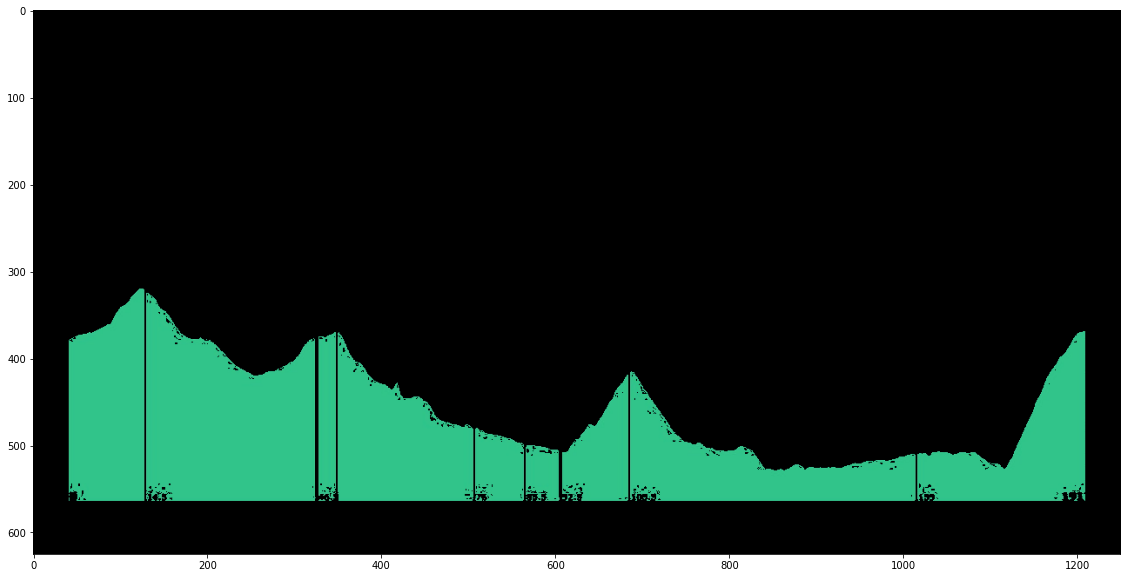

In [350]:
plt.figure(figsize=(30,10))
plt.imshow(result)


In [346]:
result

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [263]:
result

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

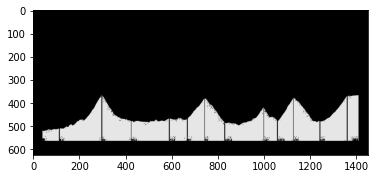

In [253]:
gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

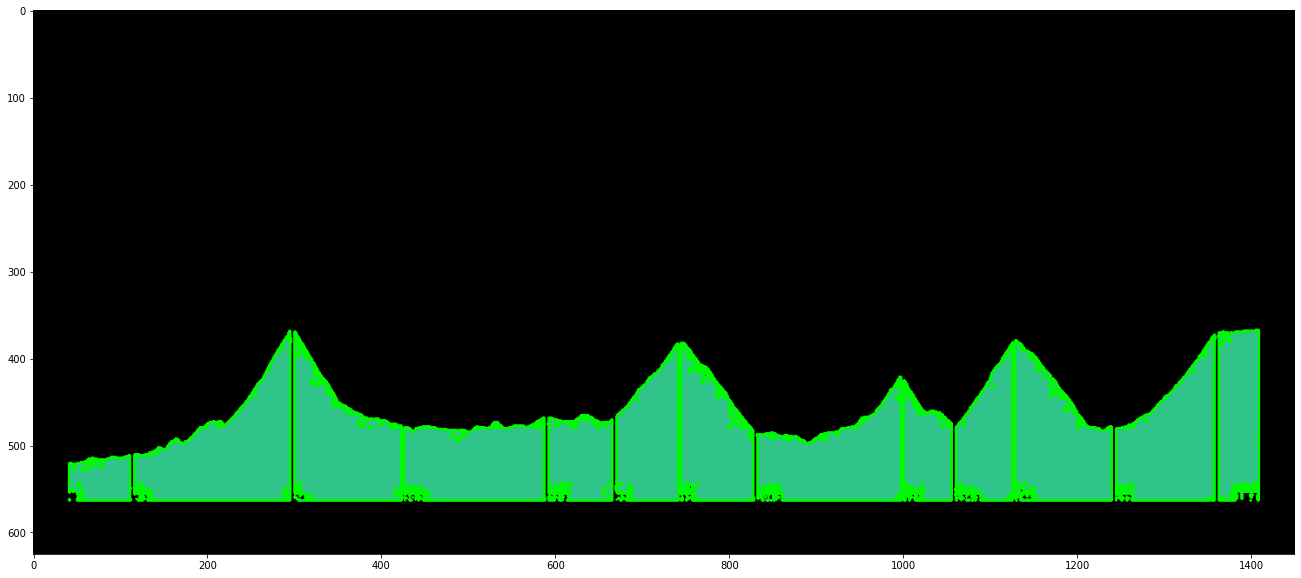

In [257]:
# find the contours from the thresholded image
contours, hierarchy = cv2.findContours(gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# draw all contours
image = cv2.drawContours(result, contours, -1, (0, 250, 0), 2)
plt.figure(figsize=(30,10))
plt.imshow(image, cmap="gray")

plt.show()

In [355]:
! pip install keras_ocr

     |████████████████████████████████| 42 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 948 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 20.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 34.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 18.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 14.8 MB/s eta 0:00:01
  Using cached validators-0.20.0-py3-none-any.whl
     |████████████████████████████████| 50 kB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 208 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 27.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/michieldekoninck/.pyenv/versions/3.8.12/envs/boonen/bin/python3.8 -m pip install

Looking for /Users/michieldekoninck/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/michieldekoninck/.keras-ocr/crnn_kurapan.h5


<AxesSubplot:>

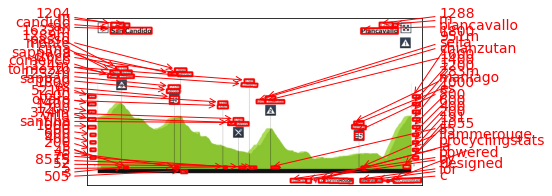

In [357]:
import matplotlib.pyplot as plt
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()
#read image from the an image path (a jpg/png file or an image url)
img = keras_ocr.tools.read(pics[0])
# Prediction_groups is a list of (word, box) tuples
prediction_groups = pipeline.recognize([img])
#print image with annotation and boxes
keras_ocr.tools.drawAnnotations(image=img, predictions=prediction_groups[0])

In [374]:
prediction_groups[0][0][0].isdigit()

True

In [383]:
prediction_groups

[[('1204',
   array([[ 89.11133 ,  20.751953],
          [137.93945 ,  20.751953],
          [137.93945 ,  37.841797],
          [ 89.11133 ,  37.841797]], dtype=float32)),
  ('1288',
   array([[1091.3086  ,   20.751953],
          [1140.1367  ,   20.751953],
          [1140.1367  ,   37.841797],
          [1091.3086  ,   37.841797]], dtype=float32)),
  ('m',
   array([[140.38086 ,  23.19336 ],
          [158.6914  ,  23.19336 ],
          [158.6914  ,  37.841797],
          [140.38086 ,  37.841797]], dtype=float32)),
  ('m',
   array([[1142.5781  ,   23.19336 ],
          [1159.668   ,   23.19336 ],
          [1159.668   ,   36.621094],
          [1142.5781  ,   36.621094]], dtype=float32)),
  ('candido',
   array([[140.38086,  39.0625 ],
          [241.69922,  39.0625 ],
          [241.69922,  62.25586],
          [140.38086,  62.25586]], dtype=float32)),
  ('san',
   array([[ 87.890625,  40.283203],
          [135.49805 ,  40.283203],
          [135.49805 ,  62.25586 ],
          [ 

In [384]:
prediction_groups_2 = [[prediction_groups[0][i] for i in range(len(prediction_groups[0])) if not prediction_groups[0][i][0].isdigit() ]]

In [385]:
prediction_groups_2

[[('m',
   array([[140.38086 ,  23.19336 ],
          [158.6914  ,  23.19336 ],
          [158.6914  ,  37.841797],
          [140.38086 ,  37.841797]], dtype=float32)),
  ('m',
   array([[1142.5781  ,   23.19336 ],
          [1159.668   ,   23.19336 ],
          [1159.668   ,   36.621094],
          [1142.5781  ,   36.621094]], dtype=float32)),
  ('candido',
   array([[140.38086,  39.0625 ],
          [241.69922,  39.0625 ],
          [241.69922,  62.25586],
          [140.38086,  62.25586]], dtype=float32)),
  ('san',
   array([[ 87.890625,  40.283203],
          [135.49805 ,  40.283203],
          [135.49805 ,  62.25586 ],
          [ 87.890625,  62.25586 ]], dtype=float32)),
  ('piancavallo',
   array([[1022.9492  ,   41.503906],
          [1160.8887  ,   41.503906],
          [1160.8887  ,   62.25586 ],
          [1022.9492  ,   62.25586 ]], dtype=float32)),
  ('1632m',
   array([[107.421875, 184.32617 ],
          [151.36719 , 184.32617 ],
          [151.36719 , 198.97461 ],
    

In [359]:
import matplotlib.pyplot as plt
import keras_ocr
import cv2
import math
import numpy as np

In [386]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

pipeline = keras_ocr.pipeline.Pipeline()

def inpaint_text(img_path, pipeline):
    # read image
    img = keras_ocr.tools.read(img_path)
    # generate (word, box) tuples 
    prediction_groups = pipeline.recognize([img])
    mask = np.zeros(img.shape[:2], dtype="uint8")
    
    prediction_groups_2 = [[prediction_groups[0][i] for i in range(len(prediction_groups[0])) if not prediction_groups[0][i][0].isdigit() ]]
    
    for box in prediction_groups_2[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255,    
        thickness)
        img = cv2.inpaint(img, mask, 7, cv2.INPAINT_NS)
                 
    return(img)

Looking for /Users/michieldekoninck/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/michieldekoninck/.keras-ocr/crnn_kurapan.h5


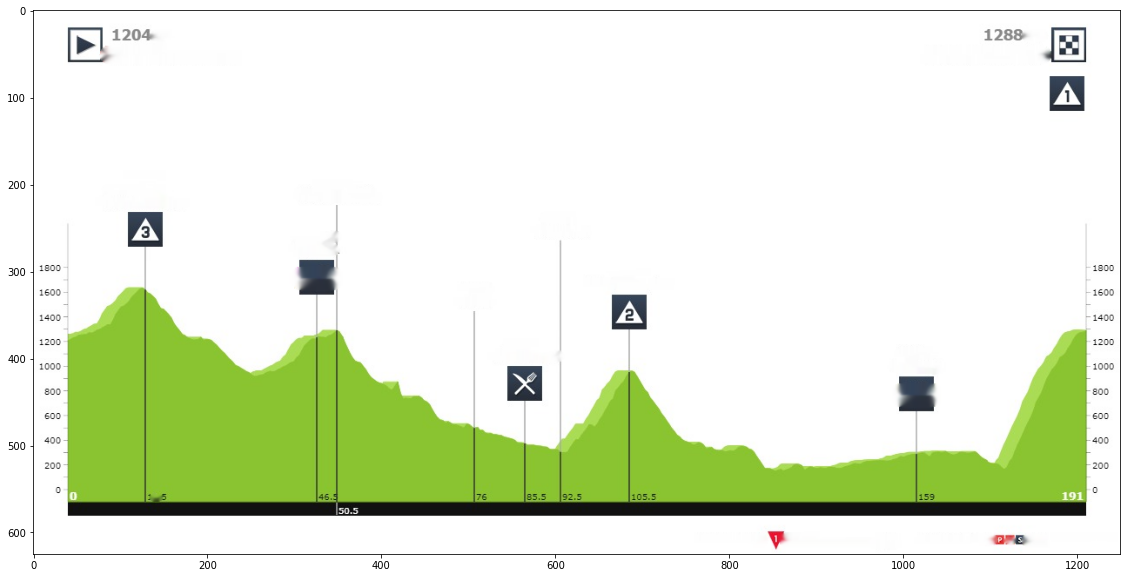

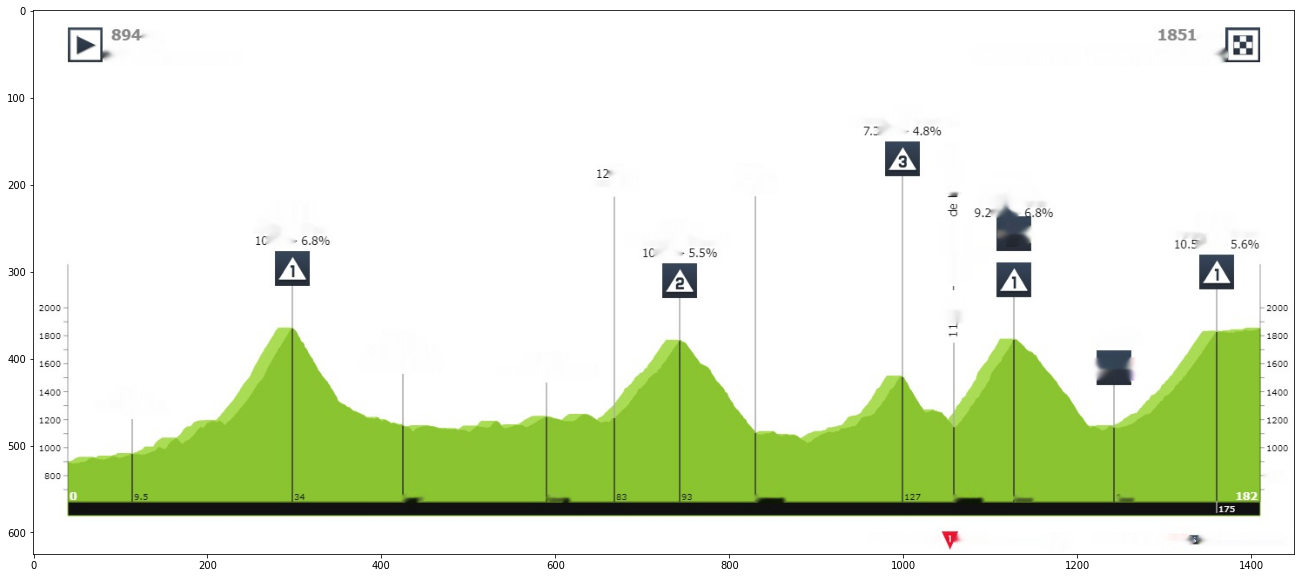

In [388]:
for pic in pics:
    image = inpaint_text(pic, pipeline)

    plt.figure(figsize=(30,10))
    plt.imshow(image, cmap="gray")

    plt.show()